In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
from nitropulse import BBCH

/home/morteza/usask/nitropulse/src/nitropulse/core.py:5: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [ ]:
pheno = BBCH(workspace_dir='/home/morteza/.nitropulse')
df = pheno.run()
print(df.shape)
df.head()

In [ ]:
print(df.shape)

In [ ]:
# df = df[df['lc'] != 177].copy()
# df.shape

In [20]:
# count records per year for lc 162 and 177
counts = df[df['lc'].isin([30, 34, 162, 110])].groupby(['lc', 'year', 'station']).size().unstack(fill_value=0).sort_index(axis=1)
counts

,station
lc,year


In [21]:
# also print totals per lc (optional)
print("\nTotals per lc:")
print(counts.sum(axis=1))


Totals per lc:
Series([], dtype: float64)


In [ ]:
# save the DataFrame to a CSV file
# df.to_csv('/home/morteza/.nitropulse/outputs/pheno_df.csv', index=False)

In [1]:
import pandas as pd

df = pd.read_csv('~/.nitropulse/outputs/pheno_df.csv').dropna(subset=['bbch'])
print(df.shape)
df.tail()

(6127, 29)


,index,date,op,vh,vv,angle,lc,station,depth,mean_sst,...,clay,classification,year,doy,base_temp,cum_gdd_air,cum_gdd_soil,cum_gdd,bbch,cum_ssm
10349,431,2023-12-23 12:50:42,1,-23.0,-15.0,30.0,146,MB5,0 to 5 cm,-2.130000,...,0.405,Clay,2023,357,5.0,7009.2,7154.576479,7081.88824,89.000000,213.466250
10350,376,2023-12-30 12:42:33,1,-22.0,-14.0,39.0,147,MB2,0 to 5 cm,-3.966667,...,0.343,Clay Loam,2023,364,10.0,7009.2,7154.576479,7081.88824,78.392316,213.607917
10351,432,2023-12-30 12:42:33,1,-25.0,-19.0,43.0,153,MB19,0 to 5 cm,-5.133333,...,0.070,Loamy Sand,2023,364,5.0,7009.2,7154.576479,7081.88824,89.000000,213.757917
10352,377,2023-12-30 12:42:33,1,-25.0,-14.0,38.0,136,MB12,0 to 5 cm,-3.791667,...,0.162,Loam,2023,364,5.0,7009.2,7154.576479,7081.88824,89.000000,213.959917
10353,377,2023-12-30 12:42:33,1,-25.0,-15.0,38.0,158,MB11,0 to 5 cm,-3.980000,...,0.368,Clay Loam,2023,364,10.0,7009.2,7154.576479,7081.88824,83.709275,214.201917


In [17]:
df.lc.value_counts()

lc
146    1568
158    1296
153    1160
147     728
136     479
122     363
167     295
157     119
133     119
Name: count, dtype: int64

In [7]:
df['lc'] = df['lc'].astype(int)
# Get unique crop types (all 8 crop types)
crop_types = df['lc'].unique()  # Replace 'lc' with your crop type column name
crop_types = sorted(crop_types)  # Take all 8 crop types
crop_types

[np.int64(122),
 np.int64(133),
 np.int64(136),
 np.int64(146),
 np.int64(147),
 np.int64(153),
 np.int64(157),
 np.int64(158),
 np.int64(167)]

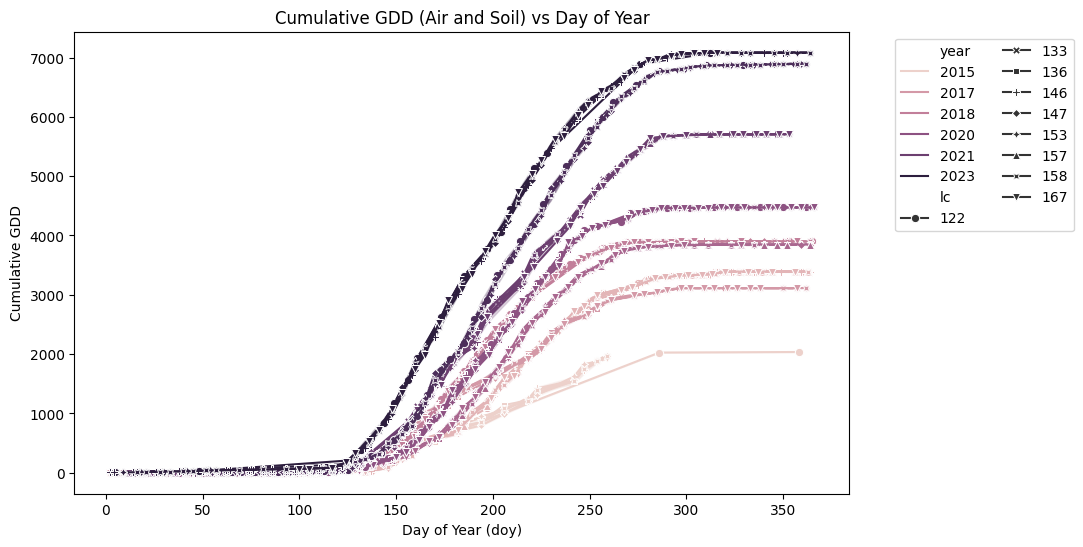

In [8]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='doy', y='cum_gdd', data=df, hue='year', style='lc', markers=True, dashes=False)
plt.xlabel('Day of Year (doy)')
plt.ylabel('Cumulative GDD')
plt.title('Cumulative GDD (Air and Soil) vs Day of Year')
plt.legend(ncol=2, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

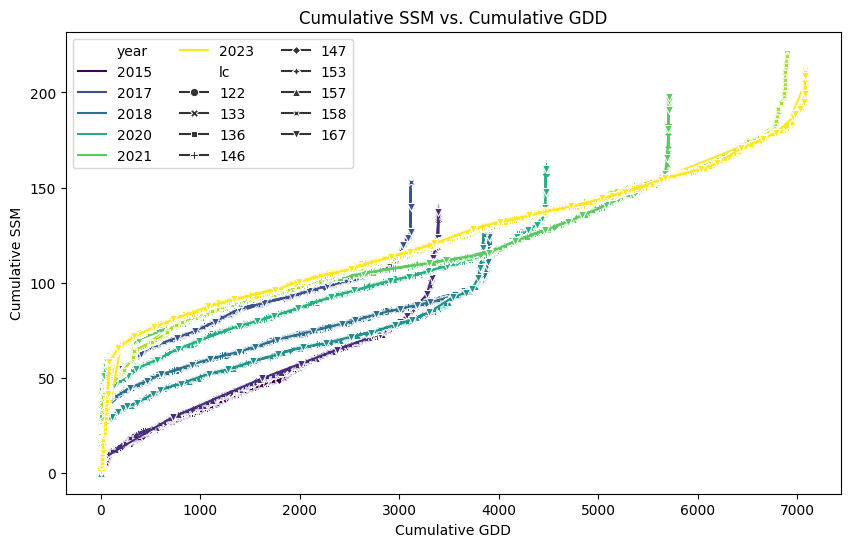

In [9]:
# Create the line plot using seaborn
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.lineplot(x='cum_gdd', y='cum_ssm', hue='year', data=df, palette='viridis', style='lc', markers=True, dashes=False)  # Use 'year' for color
plt.xlabel('Cumulative GDD')
plt.ylabel('Cumulative SSM')
plt.title('Cumulative SSM vs. Cumulative GDD')
plt.legend(ncol=3, loc='upper left')
plt.show()

In [10]:
df_bare = df[df.lc.isin([30, 34])].copy()
print(df_bare.shape)
df_bare.head()

(0, 29)


,index,date,op,vh,vv,angle,lc,station,depth,mean_sst,...,clay,classification,year,doy,base_temp,cum_gdd_air,cum_gdd_soil,cum_gdd,bbch,cum_ssm


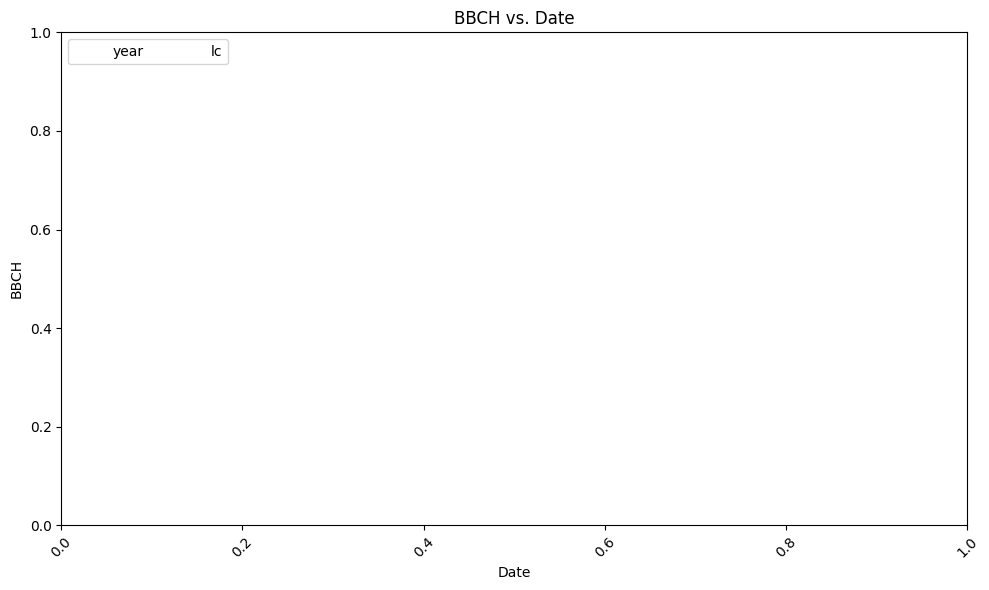

In [11]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='doy', y='bbch', data=df[df.lc.isin([30, 34, 162])], hue='year', style='lc', markers=True, dashes=False)
plt.xlabel('Date')
plt.ylabel('BBCH')
plt.title('BBCH vs. Date')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.legend(ncol=3, loc='upper left')
plt.show()

In [12]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year.astype(str)  # Extract year from date
df['doy'] = df['date'].dt.dayofyear.astype(int)  # Extract day of year from date

In [ ]:
# Get unique crop types (all 8 crop types)
# crop_types = df['lc'].unique()  # Replace 'lc' with your crop type column name
# crop_types = sorted(crop_types)  # Take all 8 crop types
# crop_types

In [22]:
crop_types = [122, 133, 136, 146, 147, 153, 157, 158, 167]
crop_types = sorted(crop_types)

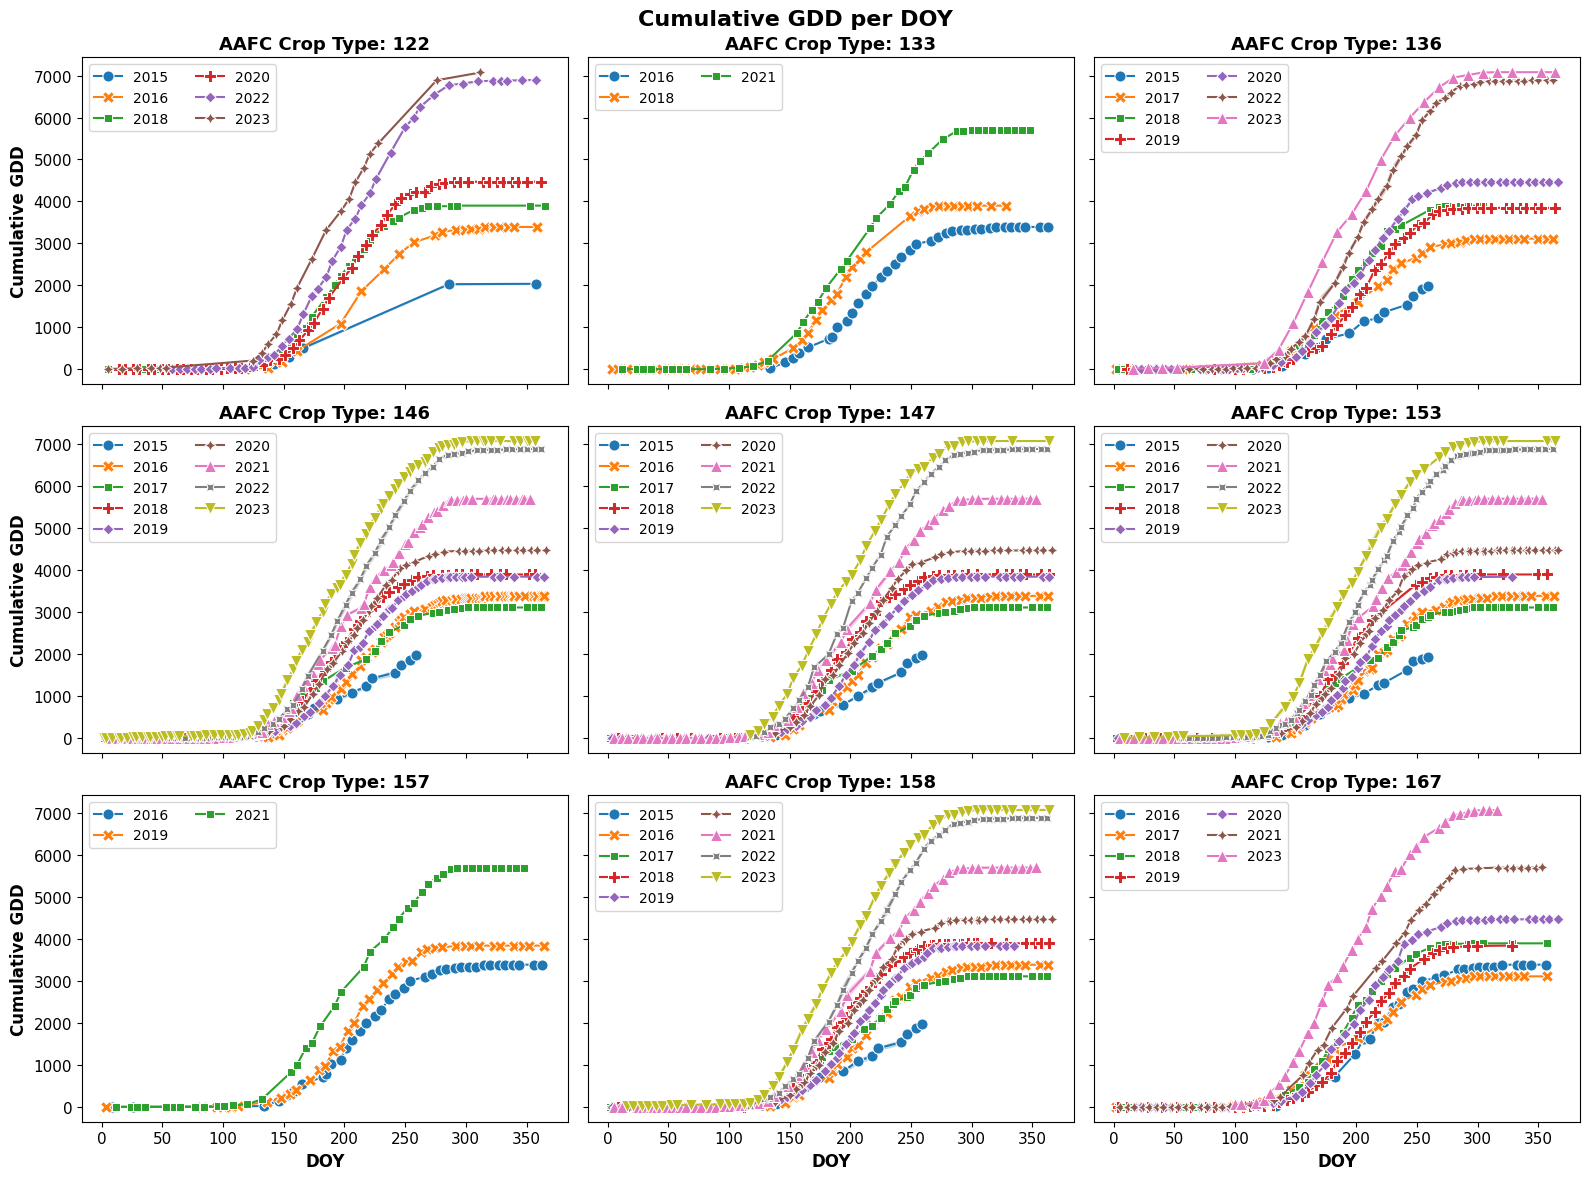

In [27]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12), sharex=True, sharey=True)
fig.suptitle('Cumulative GDD per DOY', fontsize=16, fontweight='bold')

# # Get unique crop types (all 8 crop types)
# crop_types = df['lc'].unique()  # Replace 'lc' with your crop type column name
# crop_types = sorted(crop_types)[:8]  # Take all 8 crop types

# Plot crop height for each crop type
for i, crop in enumerate(crop_types):
    row = i // 3  # Determine row (0 or 1)
    col = i % 3   # Determine column (0, 1, 2, or 3)
    
    crop_data = df[df['lc'] == crop]  # Replace 'lc' with your crop type column
    
    # Plot crop height vs DOY with year as hue and crop type as style
    sns.lineplot(x='doy', y='cum_gdd', data=crop_data, 
                 hue='year', 
                 style='year', 
                 markers=True, dashes=False, markersize=8, ax=axes[row, col], palette='tab10')
    
    axes[row, col].set_title(f'AAFC Crop Type: {crop}', fontsize=13, fontweight='bold')
    axes[row, col].set_xlabel('DOY', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('Cumulative GDD', fontsize=12, fontweight='bold')
    axes[row, col].tick_params(labelsize=11)
    
    # Adjust legend for each subplot
    legend = axes[row, col].get_legend()
    if legend:
        axes[row, col].legend(ncol=2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

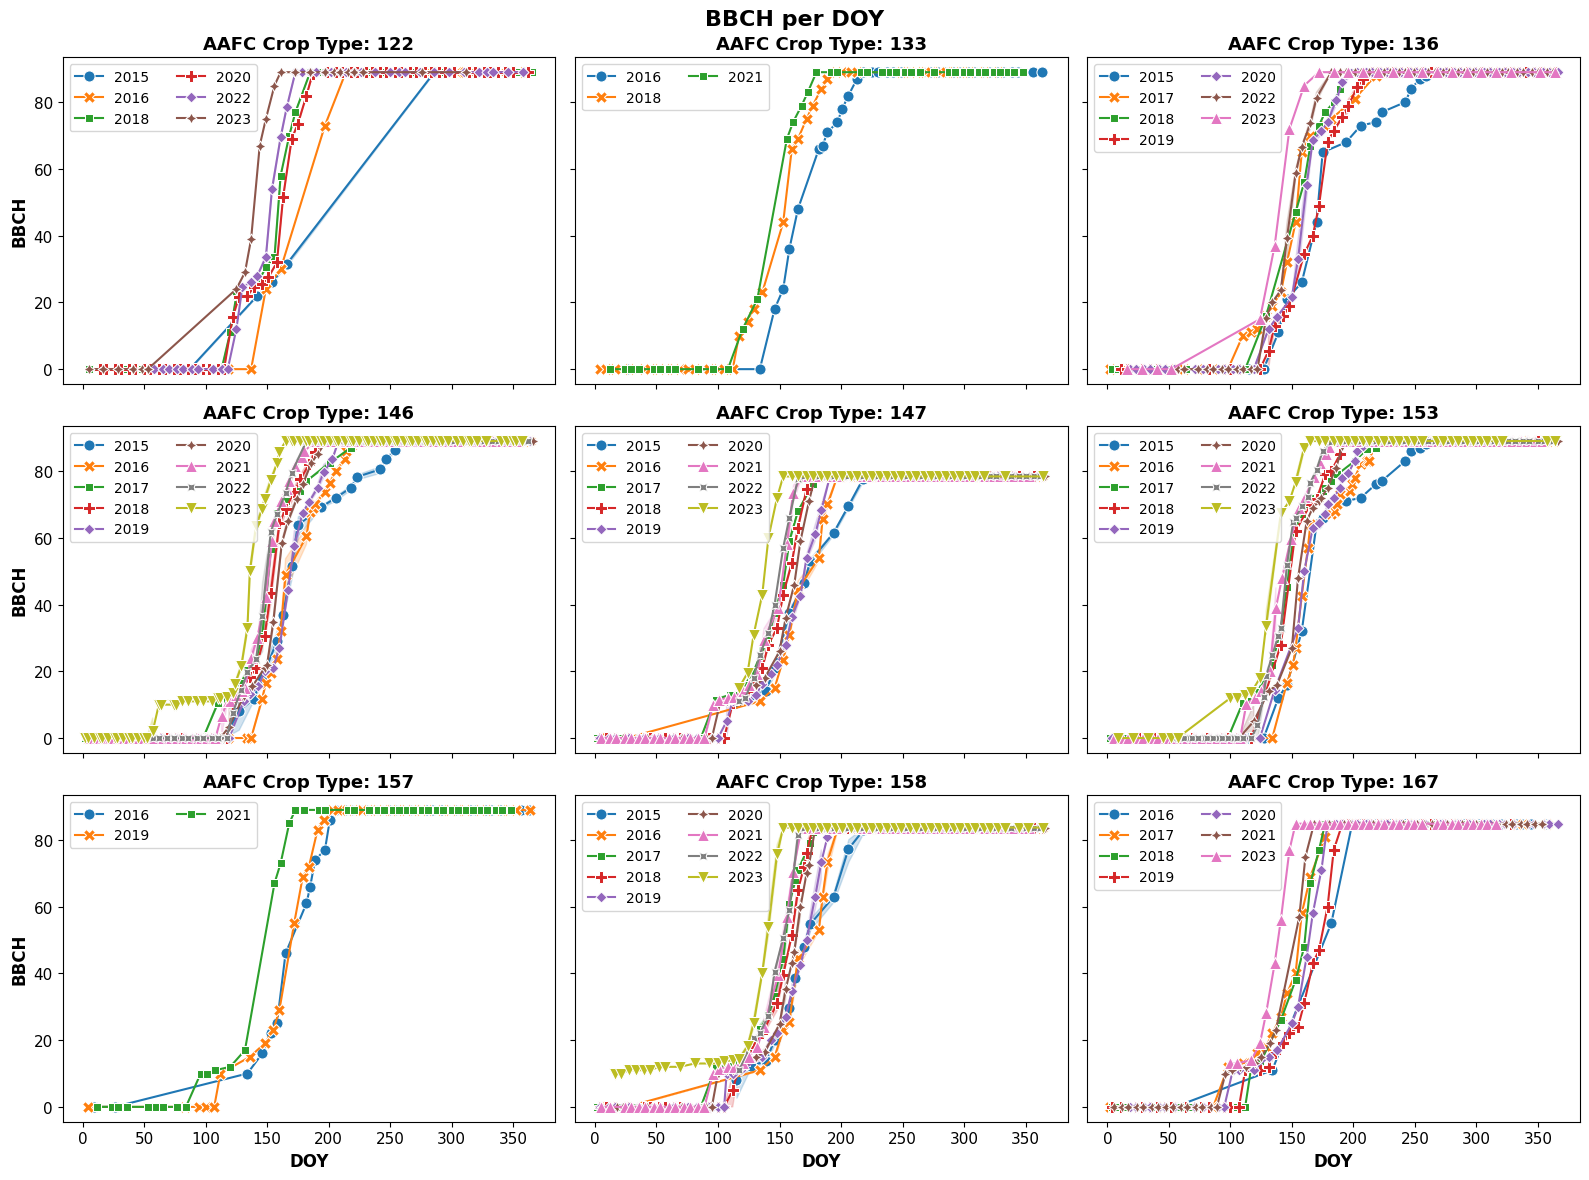

In [26]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12), sharex=True, sharey=True)
fig.suptitle('BBCH per DOY', fontsize=16, fontweight='bold')



# Plot crop height for each crop type
for i, crop in enumerate(crop_types):
    row = i // 3  # Determine row (0 or 1)
    col = i % 3   # Determine column (0, 1, 2, or 3)
    
    crop_data = df[df['lc'] == crop]  # Replace 'lc' with your crop type column
    
    # Plot crop height vs DOY with year as hue and crop type as style
    sns.lineplot(x='doy', y='bbch', data=crop_data, 
                 hue='year', 
                 style='year', 
                 markers=True, dashes=False, markersize=8, ax=axes[row, col], palette='tab10')
    
    axes[row, col].set_title(f'AAFC Crop Type: {crop}', fontsize=13, fontweight='bold')
    axes[row, col].set_xlabel('DOY', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('BBCH', fontsize=12, fontweight='bold')
    axes[row, col].tick_params(labelsize=11)
    
    # Adjust legend for each subplot
    legend = axes[row, col].get_legend()
    if legend:
        axes[row, col].legend(ncol=2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

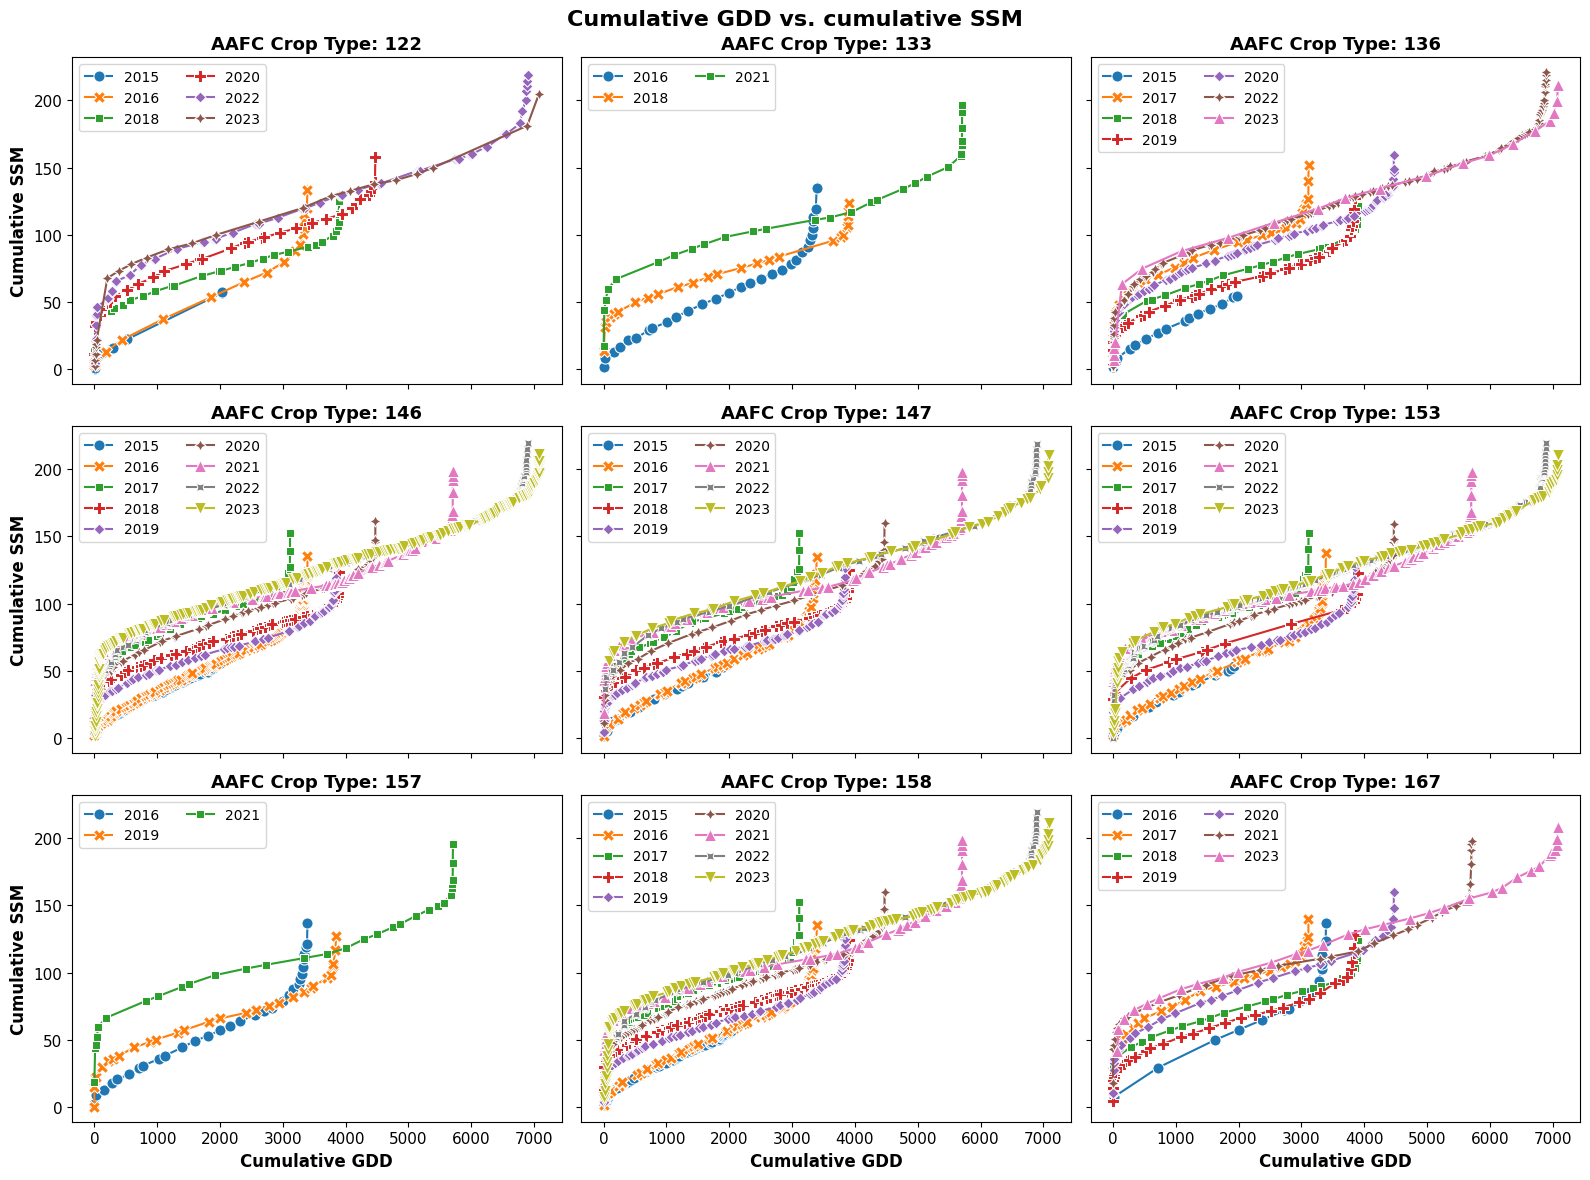

In [29]:
fig, axes = plt.subplots(3, 3, figsize=(16, 12), sharex=True, sharey=True)
fig.suptitle('Cumulative GDD vs. cumulative SSM', fontsize=16, fontweight='bold')

# # Get unique crop types (all 8 crop types)
# crop_types = df['lc'].unique()  # Replace 'lc' with your crop type column name
# crop_types = sorted(crop_types)[:8]  # Take all 8 crop types

# Plot crop height for each crop type
for i, crop in enumerate(crop_types):
    row = i // 3  # Determine row (0 or 1)
    col = i % 3   # Determine column (0, 1, 2, or 3)
    
    crop_data = df[df['lc'] == crop]  # Replace 'lc' with your crop type column
    
    # Plot crop height vs DOY with year as hue and crop type as style
    sns.lineplot(x='cum_gdd', y='cum_ssm', data=crop_data, 
                 hue='year', 
                 style='year', 
                 markers=True, dashes=False, markersize=8, ax=axes[row, col], palette='tab10')
    
    axes[row, col].set_title(f'AAFC Crop Type: {crop}', fontsize=13, fontweight='bold')
    axes[row, col].set_xlabel('Cumulative GDD', fontsize=12, fontweight='bold')
    axes[row, col].set_ylabel('Cumulative SSM', fontsize=12, fontweight='bold')
    axes[row, col].tick_params(labelsize=11)
    
    # Adjust legend for each subplot
    legend = axes[row, col].get_legend()
    if legend:
        axes[row, col].legend(ncol=2, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()